In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
# to check the null values 
dataset.isnull().sum()

Number of atoms                                                          0
Relative number of N  atoms                                              0
Relative number of Cl atoms                                              0
Wiener index                                                             0
Kier&Hall index (order 3)                                                0
Average Information content (order 0)                                    0
Balaban index                                                            0
Max partial charge for a N  atom [Zefirov's PC]                          0
Min partial charge for a N  atom [Zefirov's PC]                          0
Polarity parameter / square distance                                     0
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                        0
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                        0
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]           0
LUMO energy              

In [5]:
dataset.isnull().count()

Number of atoms                                                          1056
Relative number of N  atoms                                              1056
Relative number of Cl atoms                                              1056
Wiener index                                                             1056
Kier&Hall index (order 3)                                                1056
Average Information content (order 0)                                    1056
Balaban index                                                            1056
Max partial charge for a N  atom [Zefirov's PC]                          1056
Min partial charge for a N  atom [Zefirov's PC]                          1056
Polarity parameter / square distance                                     1056
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                        1056
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                        1056
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]  

In [6]:
x = dataset.drop(['Act'],axis=1).astype(float)
y = dataset['Act']

In [7]:
x.shape

(1056, 29)

In [8]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [50]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=47, shuffle=True) 

In [51]:
x_test.shape

(212, 29)

In [52]:
y_test.shape

(212,)

In [53]:
y_train.shape

(844,)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor = RandomForestRegressor ( n_estimators = 700, max_depth=None, 
                                   max_features='auto',  
                                   min_samples_split=2,  random_state=42)

In [56]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [57]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=700, random_state=42)

In [58]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:11.812000


In [59]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [60]:
y_pred_train = regressor.predict(x_train)

In [61]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [62]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [63]:
 # model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [64]:
print("The model performance for testing set")
print("--------------------------------------") 
print('MAE is {}'.format(mae)) 
print('MSE is {}'.format(mse)) 
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.15580790200359387
MSE is 0.053610641141396076
R2 score is 0.7946586501022634


In [65]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [66]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.07194970229293622
MSE is 0.011071012756407728
R2 score is 0.9520620967855276


In [67]:
cvscoreval = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [68]:
print("The CV score for Training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoreval))

The CV score for Training set
--------------------------------------
[0.71405681 0.53042261 0.6699819  0.58563884 0.60853859]
Q2 is 0.6217277521643647


In [69]:
#Performance on Out-bag sample 
# R2 value on unseen data (cross validation using hold-out set concept)
random_forest_out_of_bag = RandomForestRegressor(oob_score=True,n_estimators =700,  min_samples_split=2, max_features='auto', random_state = 42)

In [70]:
random_forest_out_of_bag.fit(x_train, y_train)


RandomForestRegressor(n_estimators=700, oob_score=True, random_state=42)

In [71]:
print(random_forest_out_of_bag.oob_score_)

0.6481794501683922


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

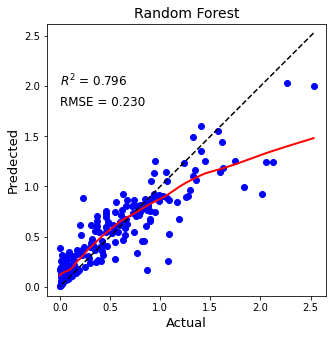

In [73]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.796', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.230', fontsize = 12)
plt.title('Random Forest', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

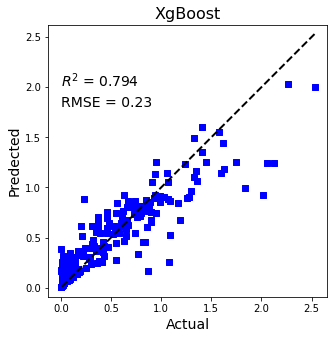

In [74]:
# add the best fit line to the scatter plot
plt.figure(figsize=(5,5))
plt.yscale('linear')
plt.xscale('linear')
plt.scatter(y_test, y_pred, c='blue', marker='s')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'black', linestyle='dashed',  linewidth = 2 )
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predected', fontsize=14)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.794', fontsize = 14)
plt.text(0, 1.8, 'RMSE = 0.23', fontsize = 14)
plt.title('XgBoost', fontsize = 16)
plt.show()

In [75]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#number of trees in the random forest 
n_estimators = [10,50,100,150,200,250,300, 350, 400, 450, 500, 550, 600, 700, 800, 800, 1000, 1500, 1600, 1700, 1800, 1900, 2000]
#number of features to cinsider in at every split 
max_features = ['auto', 'sqrt', 'log2']
#Max number of levels in tree
max_depth = [None,1,2,3]
#Minimum number ofsamples required to split a node 
min_samples_split =[2, 3, 4, 5, 6]
#Minimum number ofsamples required at each leaf node
min_samples_leaf =[1,2]


In [77]:
# creatting parameter gride
param_grid_regressor= {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                      'min_samples_leaf':min_samples_leaf }

In [78]:
regressor1_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [79]:
regressor1_random.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(n_estimators=700,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300, 350, 400,
                                                         450, 500, 550, 600,
                                                         700, 800, 800, 1000,
                                                         1500, 1600, 1700, 1800,
                                               

In [80]:
regressor1_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [81]:
regressor1_random.best_score_

-0.0878215627348112

In [223]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [224]:
#number of trees in the random forest 
n_estimators = [200, 300,  500, 600, 700, 900, 1000, 1400, 1500,  1600,  1700,  1800, 1900, 2000, 2100]
#number of features to cinsider in at every split 
max_features = ['auto', 'sqrt', 'log2']
#Max number of levels in tree
max_depth = [None,1, 2, 4,3]
#Minimum number ofsamples required to split a node 
min_samples_split =[2, 3, 4, 5]
#Minimum number ofsamples required at each leaf node
min_samples_leaf =[1,2,3,4]
#mathod of selceting samples of training each tree 

In [225]:
# creatting parameter gride
param_grid_regressor1= {'n_estimators': n_estimators,
                       'max_features': max_features,
                      'min_samples_split':min_samples_split }

In [226]:
print (param_grid_regressor1)

{'n_estimators': [200, 300, 500, 600, 700, 900, 1000, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5]}


In [227]:
regressor1_grid = GridSearchCV( estimator = regressor, param_grid = param_grid_regressor1,
                              cv = 5, verbose = 2, n_jobs= -1, scoring = "neg_mean_squared_error")

In [228]:
regressor1_grid.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(n_estimators=1700,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [200, 300, 500, 600, 700, 900, 1000,
                                          1400, 1500, 1600, 1700, 1800, 1900,
                                          2000, 2100]},
             scoring='neg_mean_squared_error', verbose=2)

In [229]:
regressor1_grid.best_params_

{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1700}

In [230]:
regressor1_grid.best_score_

-0.0828099836818931